In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

In [2]:
#INPUT DATA
n_print = 8 
numevelec = 50 
g_effective_theor = -49.234856968       #for InSb
k_min = -2.5e8
k_max = 2.5e8
k_step = 2e6
zero_index = np.abs(int(k_min/k_step))
k_plot = np.linspace(k_min, k_max, int((k_max - k_min)/k_step + 1))
dB = 0.05
#loc_prev = '/media/jczarnecki/HDD 1TB/NW/BFF0.45_V+-0.2/BFF0.45_V'
#loc_next = '/media/jczarnecki/HDD 1TB/NW/BFF0.55_V+-0.2/BFF0.55_V'
loc_prev = '/media/jczarnecki/HDD 1TB/NW/Lande_B0.5T/Bz0.45_Ef0.1-0.4/Bz0.45_Ef'
loc_next = '/media/jczarnecki/HDD 1TB/NW/Lande_B0.5T/Bz0.55_Ef0.1-0.4/Bz0.55_Ef'
#loc_prev = '/media/jczarnecki/HDD 1TB/NW/Bz0.45_size40-80/Bz0.45_size'
#loc_next = '/media/jczarnecki/HDD 1TB/NW/Bz0.55_size40-80/Bz0.55_size'
#loc_prev = '/media/jczarnecki/HDD 1TB/NW/Bfield0.45_Bangle_xy0-90/Bfield0.45_Bangle_xy'
#loc_next = '/media/jczarnecki/HDD 1TB/NW/Bfield0.55_Bangle_xy0-90/Bfield0.55_Bangle_xy'
n_calc = 7

#Physical constants 
ELCH = 1.602e-19
MU_B = 9.274e-24

In [3]:
g_map = np.zeros((n_calc, len(k_plot), n_print))
for i in range(0, n_calc):
    data_prev = pd.read_fwf(loc_prev + str(i) + '/OUT/ELECstates.dat', names = ['k', 'E', 'FD'], engine = 'python')
    data_next = pd.read_fwf(loc_next + str(i) + '/OUT/ELECstates.dat', names = ['k', 'E', 'FD'], engine = 'python')
    E_prev = []
    E_next = []
    for j in range(0, len(data_prev.E), numevelec):
        E_temp_prev = []
        E_temp_next = []
        for k in range(n_print):
            E_temp_prev.append(data_prev.E[j+k])
            E_temp_next.append(data_next.E[j+k])
        E_prev.append(E_temp_prev)
        E_next.append(E_temp_next)
    
    #Calculation fo g* as derivative g* = dE/dB * 2/mu_B
    for j in range(len(k_plot)):
        for k in range(n_print):
            g_map[i,j,k] = ((E_next[j][k] - E_prev[j][k])*ELCH / (MU_B*dB))
    


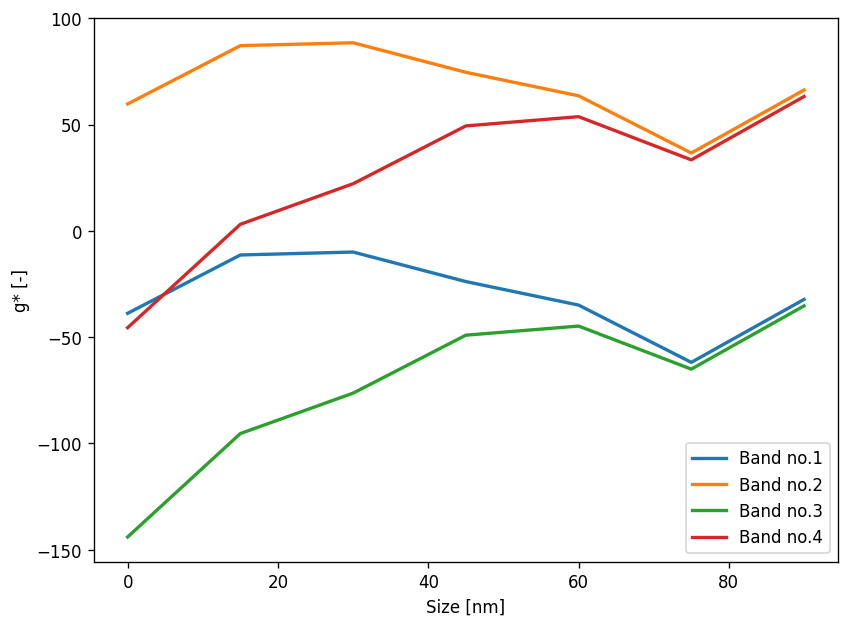

In [4]:

figure(figsize=(8,6), dpi = 120)
x = np.linspace(-0.2, 0.2, 9)
V = np.linspace(-0.2,0.2,n_calc)
angle = np.linspace(0,90,n_calc)
Ef = np.linspace(0.1,0.4,n_calc)
size = np.linspace(50,80,4)
for i in range(0,4):
    plt.plot(angle, g_map[:,zero_index,i], lw = 2, label = 'Band no.' + str(i+1))
#plt.xlabel(r'$E_{Fermi}$ [eV]')
#plt.xlabel(r'$\varphi$ [deg]')
plt.xlabel(r'Size [nm]')
plt.ylabel(r'g* [-]')
plt.legend()
#plt.grid(1)



<Figure size 432x288 with 0 Axes>

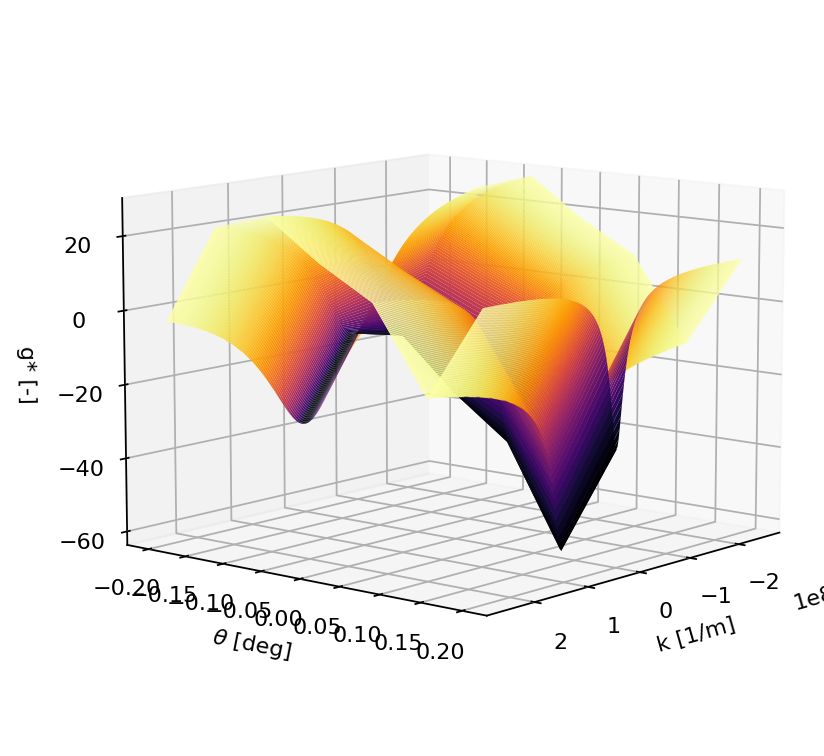

In [5]:
from mpl_toolkits import mplot3d 
fig = plt.figure()
figure(figsize=(8,6), dpi = 160)
ax = plt.axes(projection='3d')
X = k_plot
Y = V
X,Y = np.meshgrid(X,Y)
ax.plot_surface(X,Y,g_map[:,:,0], cmap = 'inferno', cstride = 1, edgecolor = 'none')
ax.set_xlabel('k [1/m]')
ax.set_ylabel(r'$\theta$ [deg]')
ax.set_zlabel('g* [-]')
ax.view_init(elev = 10, azim = 40)

Text(0.5, 1.0, 'g*(k,$E_{Fermi}= 0.4 [eV]$)')

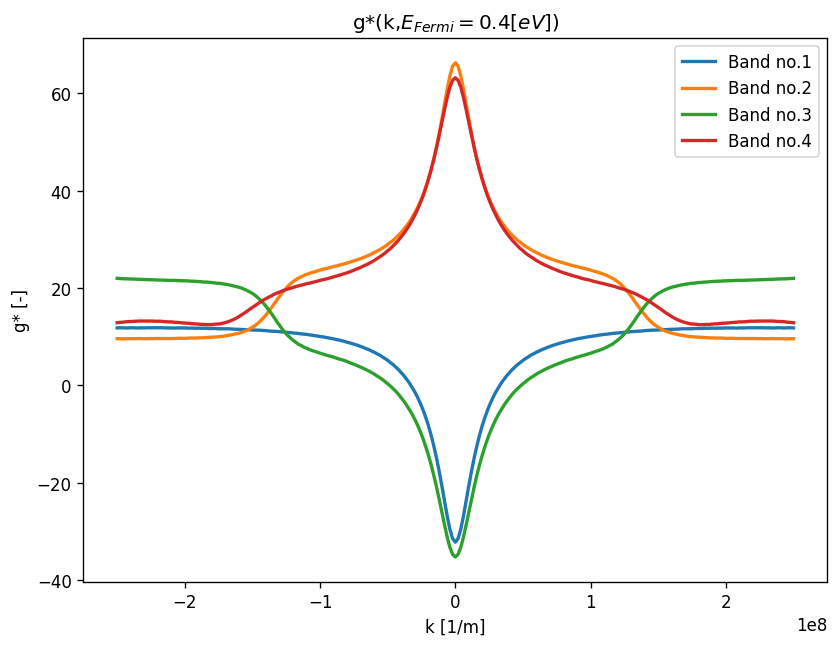

In [6]:
figure(figsize=(8,6), dpi = 120)
for i in range(0,4):
    plt.plot(k_plot, g_map[6,:,i], lw = 2, label = 'Band no.' + str(i+1))
plt.legend()
plt.xlabel(r'k [1/m]')
plt.ylabel(r'g* [-]')
plt.title(r'g*(k,$E_{Fermi}= 0.4 [eV]$)')

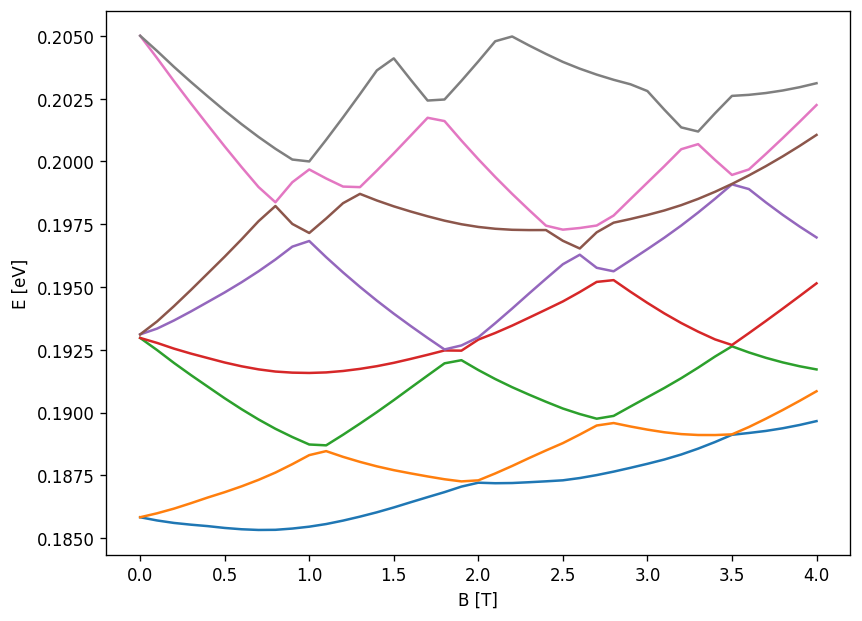

In [7]:
# E(B,k = 0) for different states 
E_minima = np.zeros((41,n_print))
B_plot = np.linspace(0,4,41)
k_max = 1.6e8 
k_min = -1.6e8
k_step = 2e6
loc = '/media/jczarnecki/HDD 1TB/NW/V0_Bz0-4/V0_Bz'

for i in range(41):
    data = pd.read_fwf(loc + str(i) + '/OUT/ELECstates.dat', names = ['k', 'E', 'FD'], engine = 'python')
    for k in range(n_print):
       E_minima[i,k] = data.E[int((k_max - k_min)/(2*k_step))*numevelec + k]


figure(figsize=(8,6), dpi = 120)
#plt.grid(1)
plt.xlabel('B [T]')
plt.ylabel('E [eV]')
plt.plot(B_plot, E_minima)


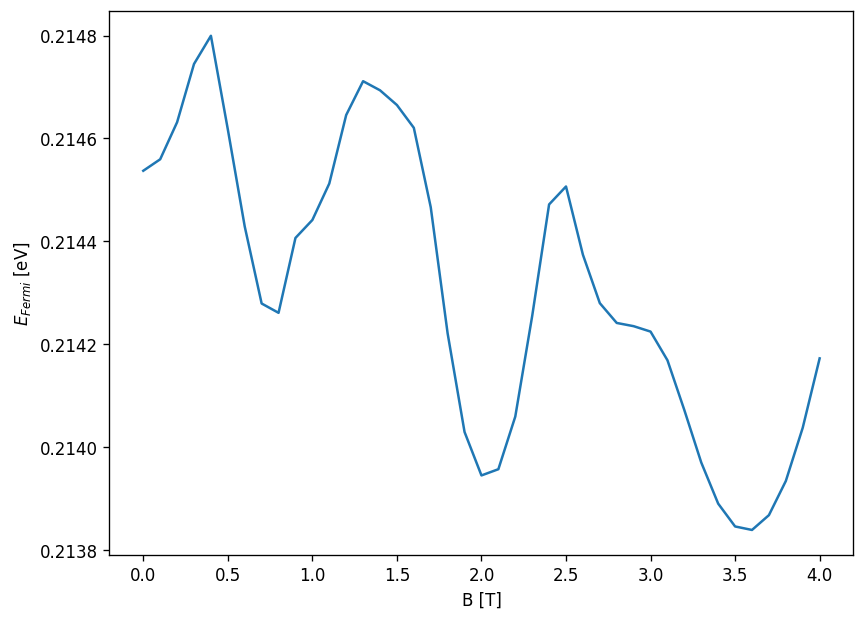

In [10]:
E_fermi = np.zeros(41)

for i in range(41):
    data = pd.read_fwf(loc + str(i) + '/OUT/fermi_energy.dat', names = ['E_fermi'], engine = 'python')
    E_fermi[i] = data.E_fermi

figure(figsize=(8,6), dpi = 120)
#plt.grid(1)
plt.xlabel('B [T]')
plt.ylabel(r'$E_{Fermi}$ [eV]')
plt.plot(B_plot, E_fermi)